In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical  #hot encoding

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [5]:
(X_train, y_train),(X_test, y_test) = mnist.load_data() #loads 60000 training data set and 10000 test data sets

In [6]:
print(X_train.shape)
print(y_train) #labelling of data
print(X_test.shape)

(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


In [8]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of image are not 28X28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of image are not 28X28"

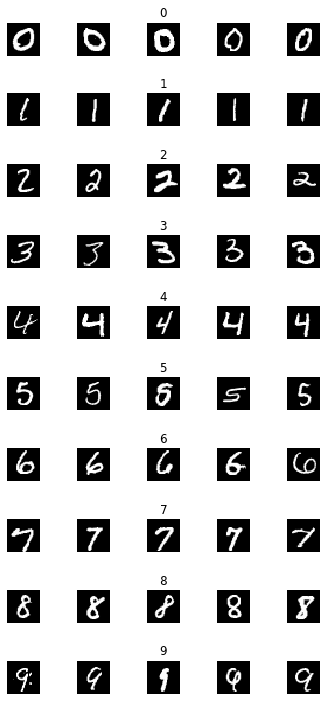

In [9]:
num_of_samples = []
cols = 5

num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()
for i in range (cols):
     for j in range (num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), : ,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0.5, 1.0, 'Distribution of training Dataset')

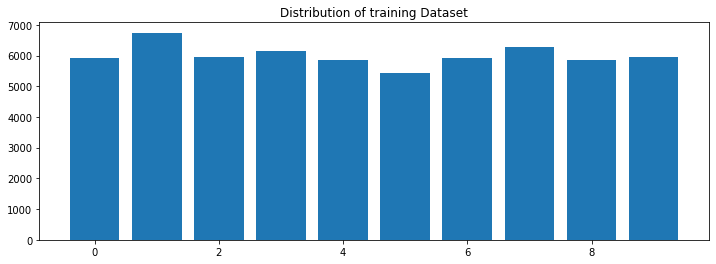

In [10]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of training Dataset")

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)


In [12]:
X_train = X_train/255  # Normalisation
X_test = X_test/255

In [13]:
num_of_pixels = 784  # For reshaping into one array
X_train =  X_train.reshape(X_train.shape[0],num_of_pixels)
X_test =  X_test.reshape(X_test.shape[0],num_of_pixels)
print(X_train.shape)
print(X_test.shape)
        

(60000, 784)
(10000, 784)


In [14]:
def create_model():
    model = Sequential()
    model.add(Dense(num_of_pixels, input_dim=num_of_pixels, activation = 'relu'))
    model.add(Dense(1000, activation = 'relu')) #hidden layer
    model.add(Dense(num_classes, activation = 'softmax'))#output layer
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics = ['accuracy'])
    return model

In [15]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,410,450
Trainable params: 1,410,450
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 5, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 18s 332us/step - loss: 0.3282 - accuracy: 0.9117 - val_loss: 0.1310 - val_accuracy: 0.9605
Epoch 2/5
54000/54000 [==============================] - 19s 350us/step - loss: 0.1301 - accuracy: 0.9611 - val_loss: 0.1087 - val_accuracy: 0.9658
Epoch 3/5
54000/54000 [==============================] - 15s 276us/step - loss: 0.1097 - accuracy: 0.9678 - val_loss: 0.0940 - val_accuracy: 0.9715
Epoch 4/5
54000/54000 [==============================] - 15s 278us/step - loss: 0.0943 - accuracy: 0.9726 - val_loss: 0.1024 - val_accuracy: 0.9742
Epoch 5/5
54000/54000 [==============================] - 20s 374us/step - loss: 0.0755 - accuracy: 0.9776 - val_loss: 0.1450 - val_accuracy: 0.9657


Text(0.5, 0, 'epoch')

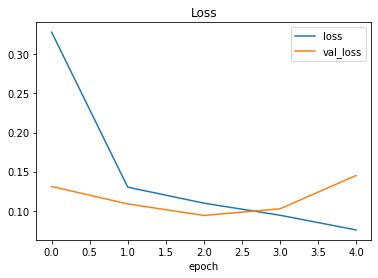

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

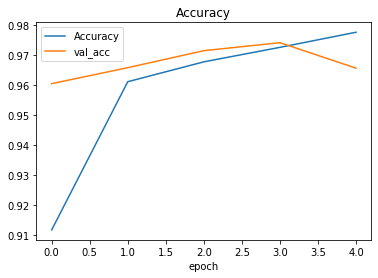

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')


In [19]:
score = model.evaluate(X_test, y_test, verbose =0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.15129173536531307
Test accuracy: 0.9652000069618225


<Response [200]>


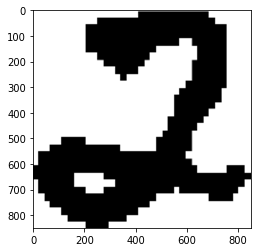

In [20]:
import requests
from PIL import Image
url  = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream =True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

In [21]:
import cv2

img_array = np.asarray(img)
print(img_array.shape)

(850, 850, 4)


[[255 255 255 255 255 255 255 255 255 255 255 255 255 137   0   0   0   0
    0   0   0   0  33 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 253 255 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   1   1
    1 255  19   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 222   0   0   0   0   0   0   0 222 255 255
  255 255 255   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 234   0   0   0   0   0 234 255 255 255
  255 255  40   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 192   0   0 118 255 255 255 255
  255 255  20   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 25

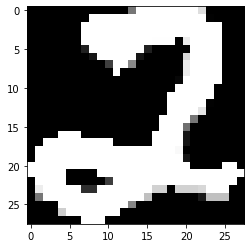

In [22]:
import cv2
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  #should be only 2D image
print(gray_scale)
image = cv2.bitwise_not(gray_scale)
plt.imshow(gray_scale, cmap=plt.get_cmap('gray'))


print('---------------------------------------------------------------------')
print('---------------------------------------------------------------------')
print('-----------------------AFTER BITWISE---------------------------------')
print('---------------------------------------------------------------------')
print('---------------------------------------------------------------------')
print(image)
plt.imshow(image, cmap=plt.get_cmap('gray'))
#print(resized.shape)

In [23]:
image=image/255
image = image.reshape(1,784)
print(image.shape)

(1, 784)


In [24]:
prediction = model.predict_classes(image)
print("Predicted Digit is:", str(prediction))

Predicted Digit is: [2]
